# IPBME6UE INF_BA_VZ: Exercise #1- Segmentation

## Spring 2024

## Group Work

For this exercise, we encourage teamwork! You can work either by yourself or in pairs (2 people working together equally and submitting one notebook for the both of you). 

Who said medical imaging had to be lonely?

**Person 1:**

YOUR NAME HERE

**Person 2:**

YOUR NAME HERE

## iPython Notebooks: A lesson in reproducibility

For those of you that are unfamiliar, iPython notebooks are interactive Python sessions that allow you to intersperse code, raw text, and markdown in a seamless manner. The next paragraph will teach you to use them.

The words you are reading right now are modifiable. Double-click me to change the text that you're reading. These modifiable boxes are called cells. They will be used to write answers to our written questions. 

Double-click the box above me now, and go ahead and fill in your name (and your partner's as well, if applicable).

Cells can contain executable code as well. If you're running the Jupyter Notebook program, You can change the type of cell by highlighting the cell of interest and going to `Cell -> Cell Type -> Markdown/Code`, and then clicking the desired cell type. If you're running the newer JupyterLab program, just click the drop-down menu next to the play, stop, and refresh icons above this window (along the top of the tabs detailing the current files that are open) and change the cell type directly there. 

You can add cells using Insert in the Jupyter Notebook program and the `'+'` icon in JupyterLab. 

The best thing about notebooks is that you can run small components of your code in one cell to make sure they work before putting them together to make a larger component. Make as many cells as you want to play and experiment, but please delete them if they are not part of your final submission. To delete a cell, highlight the cell and going to `Edit -> Delete Cells`, or use the keyboard shortcut of pressing the 'D' button twice. Make sure to not do this by mistake, but if you do, you can `"Redo Cell Operation"` from the respective menus in the different programs.

Another nice thing about notebooks - the entire homework assignment is self-contained in this file! Please put all your functions and classes into the cells of this notebook, and please write clean code with at least some annotation to help us follow your thought process. Once you're done, export the notebook to a `.pdf` file and submit (on Teams?).

In research, it is important that code is readable and reproducible. Notebooks are a natural first step toward both goals.

# Setup

Run the code in the following cells by single clicking on them and then press CTRL+ENTER (SHIFT+ENTER on Mac) or click the play button in the menu bar (the one to the left of the stop button and to the right of the up and down arrows).

The following first cell loads all the Python dependencies for this homework. It's OK if you get an error at first.

In [51]:
import numpy as np
import pydicom as dicom
import matplotlib.pyplot as plt
import os
import skimage

from pathlib import Path

%matplotlib inline

## Did you get an error like this?

`### ModuleNotFoundError: No module named 'skimage'/'numpy'/'pydicom'?`

It means you need to install some more dependencies. For example, PyDicom is not usually included.

If you are using Anaconda - [Here](https://anaconda.org/conda-forge/pydicom) is how to install PyDicom. 
If you don't have an Anaconda Python distribution, try with `pip`. You may have to use `sudo` like this:

`$ sudo pip3 install pydicom`

But try first without `sudo`.


[Here](http://pydicom.readthedocs.io/en/stable/getting_started.html) is some PyDicom documentation which might be useful later on in the assignment.

The other dependencies like scikit-image are installed [similarly](http://scikit-image.org/docs/dev/install.html).


You may need to do the same for `skimage`:

`$ sudo pip3 install scikit-image`

Note: You can also install packages from within the Jupyter kernal. Try running the code in the cell below, which attempts to install NumPy:

In [52]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.tttech.com/api/pypi/infrastructure.pypi/simple

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


# The Data

The data consist of sets of DICOM images that hold completely anonymized chest CT scans (see section “Reading in the Data”). DICOM (Digital Imaging and Communications in Medicine) is a standardized format for transmitting medical image data. Each DICOM file is composed of two parts: the image data as well as a header giving you a lot of metadata about the patient and specifics about the imaging parameters (e.g. space between slices).

You can choose any of the patients in the dataset to prototype your code, but you are expected to generalize your algorithm to work for at least ten different patients to show robustness. The more you do, the more you’ll prove your algorithm.

First, let's make sure you can read in the data.

In the cell below, replace the `scans_path` string variable with the (relative or absolute) path to the place where you put the data. Particularly, look for the folder that contains scans. Each scan is in its own folder and has a name, e.g. 0d7a1bc2-352b-41f3-882c-1c8ad9f89847. `scans_path` should be the folder that contains these oddly named folders. Once you do this, you can run the cell below to look at all the metadata associated with that slice.

It should look like this:

<img src = "figures/dicom_fields.png">

In [53]:
# Each chest CT scan is a folder with a name like R_num that within contains many .dcm files with their slice number as a name. 
# Assign the path to such folder to the variable scans_path 

# TODO: Change this variable to match the folder where your data is located!
scans_path = "LungCT-Diagnostic Pre-Surgery Contrast Enhanced" 
list_of_scans = os.listdir(scans_path)

# for figuring out the controls lets experiment with slice 122 of slice 2
scan_num = 2
scan_path = os.path.join(scans_path, list_of_scans[scan_num])
list_of_slices = os.listdir(scan_path)
slice_num = 42
slice_path = os.path.join(scan_path, list_of_slices[slice_num])

# read in the full path to the file as ds
ds=dicom.read_file(slice_path) # you may have to use pydicom instead of dicom 
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.301336971292052166103263871437
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.301336971292052166103263871437
(0008, 0020) St

## That's a lot of metadata, right? Don't be scared. Next, let's actually look at the slice.

We can see that there are many data fields in a DICOM file. There's a lot of patient information stored in a DICOM - name, birthdate, and so on. For obvious privacy reasons, this data has been completely anonymized. 

Run the following cell to view the image associated with this person.

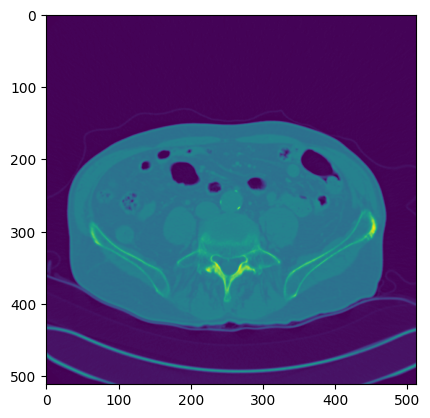

<class 'numpy.ndarray'> 439.27186584472656 uint16


In [54]:
rawimg= ds.pixel_array
plt.imshow(rawimg, cmap='viridis')
plt.show()
print(type(rawimg), np.mean(ds.pixel_array), rawimg.dtype)

We're all set. On to the problem set!

# Introduction

Segmentation is the process of dividing a given image into sections. This can be binary segmentation (if you wanted to separate the image into foreground and background) or a multilabel segmentation if you wanted to label many different parts of an image (see figures below for examples of each). Segmentation is an extremely interesting problem in image analysis, and it has yet to be solved perfectly. From an algorithmic point of view, we can approach the problem using tools such as graph cuts, watershed, flood fill / region growing, statistical set separation, etc... From a machine learning point of view, we can think of the problem as a pixel classification problem that can be solved with some supervised learning algorithm (assuming we had some ground truth training data) or an unsupervised learning algorithm (such as k-means clustering).

<img src = "figures/segmentation0.jpg" >

(a) Binary Segmentation - A binary segmentation of some grains of rice. We can use segmentation to create a binary mask that allows us to separate the rice (foreground) from the darker background. 

<img src = "figures/segmentation1.jpg" >

(b) Multilabel Segmentation - A multilabel segmentation of a coronal section from a magnetic resonance image of the brain. We can see that different colors represent different sections of the brain. For example, the white matter on the left side of the brain is labeled with a different color than the white matter on the right side of the brain. 

A lot of radiological image analysis begins with segmentation. For example, to quantitatively describe a lung nodule, you may want to collect data on its edge sharpness, its total volume, and/or the mean intensity of voxels in the nodule. However, to do this, we have to first be able to segment the nodule and cleanly define its boundaries. This can get extremely hairy. For example, in the chest, it might be hard to teach a program to segment a nodule in the lung from a seed voxel. It's important to make sure the nodule segmentation doesn’t bleed into the pericardium, as the voxel intensities for a nodule and the fleshy bits in the pericardium are very similar. We can try and restrict this through lung field segmentation (basically, we want to go through our chest CT scans and segment out the lungs) and thus define a region of interest, but this gets increasingly difficult as more and more problems pop up.

This assignment will help you understand many core concepts taught in the lectures and hopefully
integrate the lectures into a medically relevant application. The goals of this project include:

a. Understanding medical image data format - specifically, DICOM.

b. Understanding thresholding techniques - specifically, Otsu’s Threshold.

c. Understanding morphological image analysis techniques, and expanding this understanding into 3D.

d. Understanding image convolution and expanding it into efficient 3D.

e. Understanding visualization in 3D.

f. Embracing creativity and exploring image analysis.

These can seem daunting tasks for a first timer, but we promise the final results will be amazingly cool! Stick with us, and as always, don't hesitate to ask for help.

**The main goal of this assignment is to segment out the lungs, and only the lungs, from these CT slices, and then create a 3D rendering of the lungs to give yourself some way to qualitatively assess how good your segmentation is. Basically, given a chest CT series, you will be creating something like this:**

<img src = "figures/lung_field_segmentation.png" >

# Step 1: (5 points)

Some important DICOM fields like $RescaleIntercept$ and $RescaleSlope$ determine how the image pixel values should be interpreted. These metadata are critical for quantitative imaging methods like CT. The default raw pixel values are arbitrary units returned from the actual machine used and may differ based on the scanner manufacturer. We’d like to convert these raw values to Hounsfield units, which you learned about in lecture, in order to have some standardization among all of our CT scans. The conversion formula is:

$$ \textrm{Hounsfield Units} = RescaleSlope \times \textrm{Raw Image} + RescaleIntercept $$

<img src="figures/houndsfield.png">

### Deliverable: 

* Read in the raw data for a CT slice, and convert its pixel values into Hounsfield units. 
* Compute and print the max, min, mean, and standard deviation of both images (raw data and Hounsfield units) 
* Compare them.

In [55]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Read in the raw data for a CT slice
rawimg= ds.pixel_array
# Convert its pixel values into Hounsfield units
slope = ds.RescaleSlope
intercept = ds.RescaleIntercept
hounsfield = slope * rawimg + intercept
# Compute and print the max, min, mean, and standard deviation of both images (raw data and Hounsfield units)

hounsfield_data = {'max': np.max(hounsfield), 'min': np.min(hounsfield), 'mean': np.mean(hounsfield), 'std': np.std(hounsfield)}
rawimg_data = {'max': np.max(rawimg), 'min': np.min(rawimg), 'mean': np.mean(rawimg), 'std': np.std(rawimg)}

print('Hounsfield units:', hounsfield_data)
print('Raw data:', rawimg_data)

######################################################################################################

Hounsfield units: {'max': 1422.0, 'min': -1024.0, 'mean': -584.7281341552734, 'std': 481.0945148306176}
Raw data: {'max': 2446, 'min': 0, 'mean': 439.27186584472656, 'std': 481.0945148306176}


# Step 2: (25 points)

As you may have noticed, we live in a 3D world. The next main part of your problem will be to go from all the individual slices of the CT scan (each one stored as a .dcm file) into a 3D volume. Basically, you’ll need to figure out some way to order these slices in the right order. Read in a few of the DICOM images from your patient, and try using different DICOM fields as a sorting key. You may find one of them works well in sorting the slices in the correct order. Try looking up what that field means in the DICOM standard. *Hint: you may want to initialize a blank 3D matrix called `volCT` or something.*

Here is the pseudocode for one way (you are free to do your own) of creating this volume and filling it:

<img src = "figures/pseudocode.png"> 

Visualize the NumPy volume you create from the stacks. Feel free to do this within Python with something like matplotlib.

### Deliverable: 

Make the 3D volume and display 25 of the slices in correct order for us, like this:

<img src = "figures/lung_order.png"> 

(512, 512, 150)


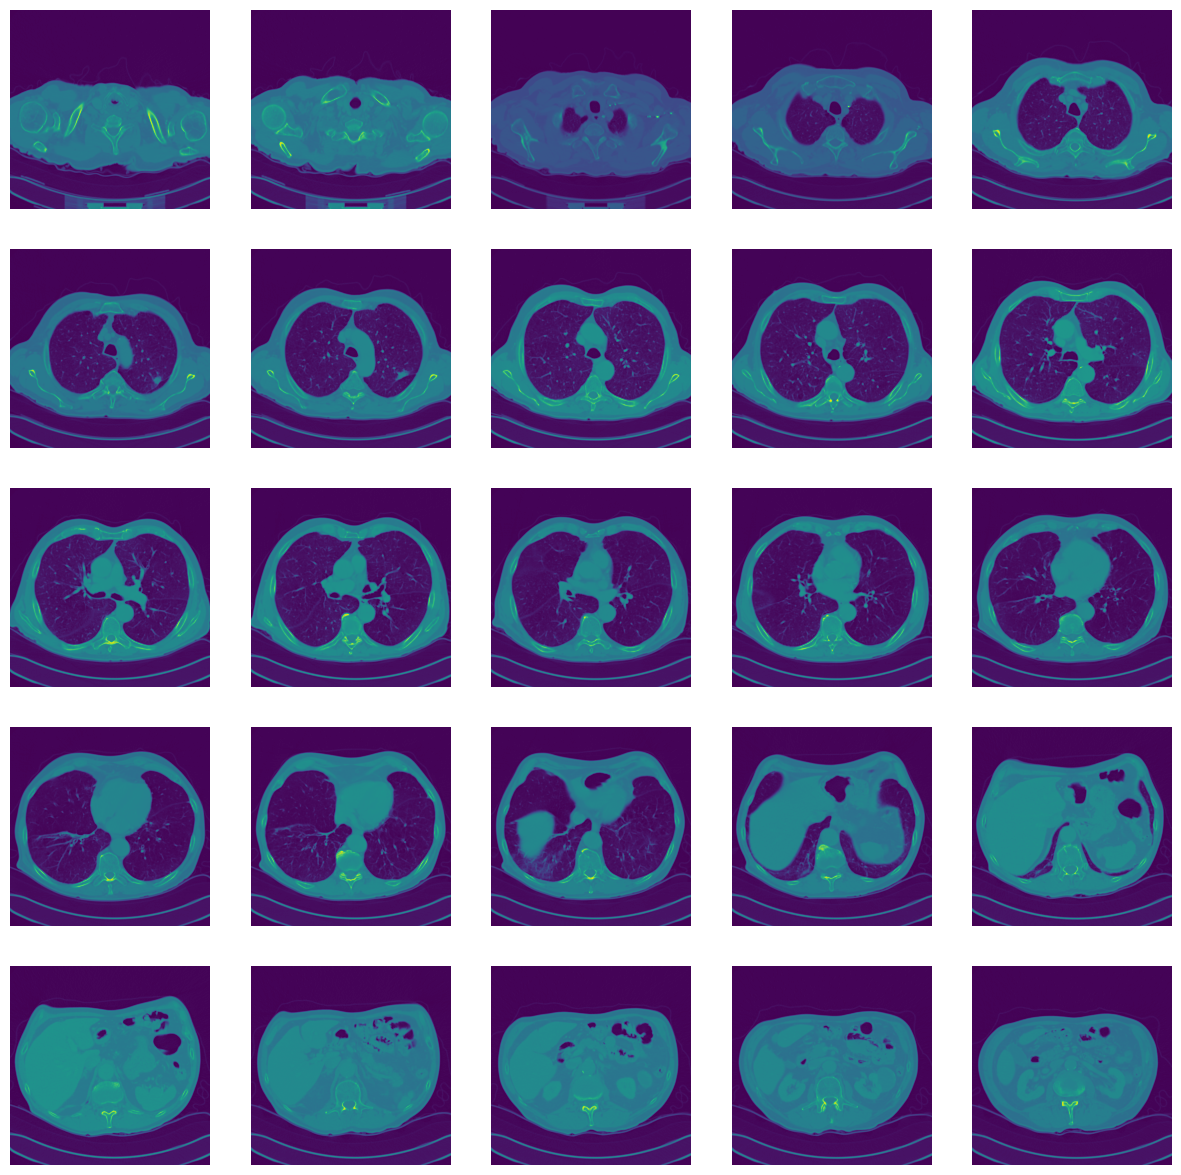

In [56]:
### WRITE CODE IN HERE. You can have up to 4 cells for this question, but only one is required #######

"""
   As you may have noticed, we live in a 3D world. The next main part of your problem will be to go from all the individual slices of the CT scan (each one stored as a .dcm file) into a 3D volume. Basically, you’ll need to figure out some way to order these slices in the right order. Read in a few of the DICOM images from your patient, and try using different DICOM fields as a sorting key. You may find one of them works well in sorting the slices in the correct order. Try looking up what that field means in the DICOM standard. *Hint: you may want to initialize a blank 3D matrix called `volCT` or something.* 
"""

"""
Visualize the NumPy volume you create from the stacks. Feel free to do this within Python with something like matplotlib
"""

volCT = np.zeros((ds.pixel_array.shape[0], ds.pixel_array.shape[1], len(list_of_slices)))
print(volCT.shape)


all_dcom_files = [dicom.read_file(os.path.join(scan_path, slice)) for slice in list_of_slices]
# In theory len(all_dcom_files) == list_of_slices
assert len(all_dcom_files) == len(list_of_slices)


for dcom in all_dcom_files:
    slice_num = int(dcom.InstanceNumber) - 1
    volCT[:,:,slice_num] = dcom.pixel_array

# Order the slices by InstanceNumber
sorted_dcom_files = sorted(all_dcom_files, key=lambda x: int(x.InstanceNumber))
sorted_slices = [dcom.pixel_array for dcom in sorted_dcom_files]

for i, dcom in enumerate(sorted_dcom_files):
    slice_num = int(dcom.InstanceNumber) - 1
    volCT[:,:,slice_num] = sorted_slices[i]
    



# Display 25 slices of the 3D volume
fig, ax = plt.subplots(5, 5, figsize=[15,15])
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(volCT[:,:,(i*5+j)*5], cmap='viridis')
        ax[i, j].axis('off')

plt.show()

# WORKS BUT THE ORDER IS WRONG?

# Goal: Make the 3D volume and display 25 of the slices in correct order

######################################################################################################

In [57]:
### WRITE CODE IN HERE. You can have up to 4 cells for this question, but only one is required #######

 


######################################################################################################

# Step 3 (5 points)

If you dont already know about numerical types, take a look [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html) and/or [here](https://www.tutorialspoint.com/numpy/numpy_data_types.htm).

### Deliverable: 

What is the default numerical type used to store raw image data in DICOM files? Answer in the cell below.

In the coding cell below that one, convert all the voxels in your volume to a **float32** type number between 0.0 and 1.0; output the min, max, and dtype (datatype) of the voxels in your volume before and after you convert.

**Answer:** YOUR ANSWER TO STEP 3 PART 1 HERE

In [58]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######



# The default numerical type used to store raw image data in DICOM files is uint16

import numpy as np

# Assuming your volume is stored in the variable 'volume'
# Convert to float32


volume_float32 = volCT.astype(np.float32)

# Normalize to range [0, 1]
volume_float32 /= np.max(volume_float32)

# Output the min, max, and dtype of the voxels before and after conversion
print("Before conversion - Min:", np.min(volCT), "Max:", np.max(volCT), "Dtype:", volCT.dtype)
print("After conversion - Min:", np.min(volume_float32), "Max:", np.max(volume_float32), "Dtype:", volume_float32.dtype)

# Check that the conversion worked
assert volume_float32.dtype == np.float32

# Check that the normalization worked
assert np.min(volume_float32) == 0
assert np.max(volume_float32) == 1

######################################################################################################

Before conversion - Min: 0.0 Max: 4095.0 Dtype: float64
After conversion - Min: 0.0 Max: 1.0 Dtype: float32


# Step 4 (10 points)

Now that we have our 3D matrix of lung CT data, we can try to segment out our lung. We know from lecture that the pixel values of CT scans are given in Hounsfield units, where lower Hounsfield units correspond to low density materials (like air) that are not highly attenuative for X-rays and higher Hounsfield units correspond to highly attenuative materials, like bone.

<img src = "figures/histWithThresh.png"> 

That red line separating the two groups of pixels is the [Otsu's threshold](https://en.wikipedia.org/wiki/Otsu%27s_method). We can find a nice separating value of our two modes with [this Otsu’s method](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html).

### Deliverable:

A histogram of the Hounsfield units from a typical CT scan will be significantly [bimodal](https://en.wikipedia.org/wiki/Multimodal_distribution)! Why?

**Answer:** YOUR ANSWER TO STEP 4 PART 1 HERE: It will be bimodal because usually while scanning a patient, the CT scanner will pick up two main types of tissue - soft tissue and bone. Each representing roughly half of the histogram. (This is an over simplification, as in reality, the histogram will be more complex, due to the presence of other tissues, like fat, and the fact that the scanner will pick up some noise as well.)

Next, find the Otsu's threshold in your volume of pixels and plot the histogram of of your pixels with this line like the example figure. You will find these links ([1](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html), [2](https://matplotlib.org/stable/gallery/axes_grid1/scatter_hist_locatable_axes.html), and [3](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html)) useful if you have not done this before.

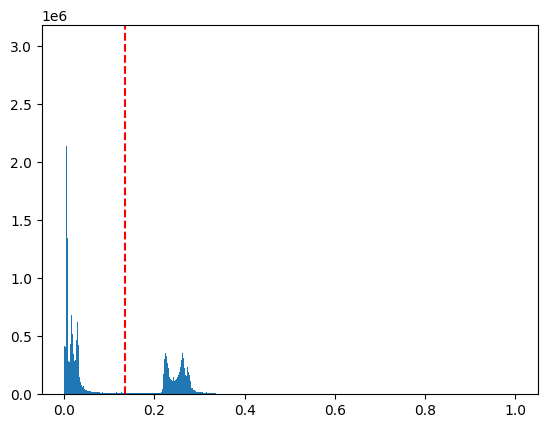

In [59]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

#Next, find the Otsu's threshold in your volume of pixels and plot the histogram of of your pixels with this line like the example figure
# You can use the function skimage.filters.threshold_otsu to find the threshold and the function plt.hist to plot the histogram

from skimage.filters import threshold_otsu

# Find the Otsu's threshold
thresh = threshold_otsu(volume_float32)

# Plot the histogram
plt.hist(volume_float32.flatten(), bins=1000)
plt.axvline(x=thresh, color='r', linestyle='--')
plt.show()


######################################################################################################

# Step 5 (10 points)

We can now take a look at the performance of Otsu’s threshold. We want all the pixels less than Otsu’s threshold since the lung is in the darker (low Hounsfield units) part of the image.

<img src="figures/otsu.png">

Despite the crude binary cutoff, we can see that this is really close to what we want for a final result, albeit a little noise.

### Deliverable:

Display for us one slice of the CT scan showing a binary image after applying thresholding using Otsu's method.

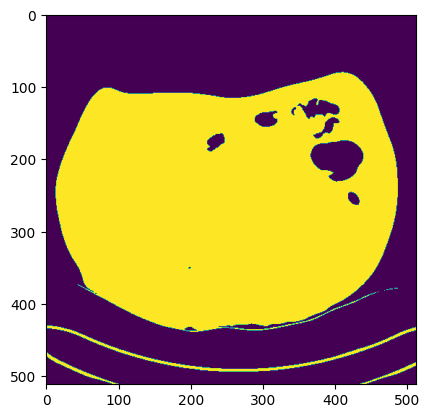

In [60]:
### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######

# Apply the threshold to the volume and visualize the result
# You can use the function plt.imshow to visualize the result

filters = skimage.filters
thresh_otsu =  filters.threshold_otsu(volume_float32)


plt.imshow(volume_float32[:,:,100] > thresh_otsu)
plt.show()


######################################################################################################

# Step 6 (30 points)

We can see our dark lungs surrounded by lighter-colored tissue, which is then again surrounded by the darkness of the 0-pixels. Our lung segmentation is thus, interestingly, completely separated from the segmentation of the outside air. These two sets of binary-connected components are completely unconnected. 

> Can you think of a simple way of differentiating between the dark lungs and the dark air outside the body?

Here's one way to do it - we assume that the outside air will always be touching the edge of the image and the lungs will not:

<img src="figures/pseudocode2.png">

However, the segmentation is still rough around the edges. There are a few pixels of noise around the main lung (components that weren’t touching the edges but still aren’t part of the lung). Luckily for us, these bits are relatively small in size. We can, therefore, quickly filter them out based on their volume. We want to choose connected components whose volume is larger than some threshold $V$. You can set $V$ arbitrarily (most noise will have pixel counts in the double digits or maybe low hundreds), as long as the lung volume should have a pixel count several orders of magnitude higher.
Here would be a possible pseudo-algorithm for this task:

<img src="figures/pseudocode3.png">

After this, we just want to smooth out the edges. The segmentation of our lung looks very ragged because it wasn’t able to pick out the lighter colored blood vessels in the lung. We can do this smoothing with a binary closing algorithm, provided by the `scikit-image` package (`skimage.morphology.binary_closing`). It works for both 2-dimensional and 3-dimensional binary matrices.

### Deliverable:

Implement the steps described here and display for us an ordered sample of the cuts from your boolean CT scan volume that has been smoothed, with only the pixels of the lung and trachea as 1/true, and everything else as 0/False,  like this:

<img src="figures/final.png">

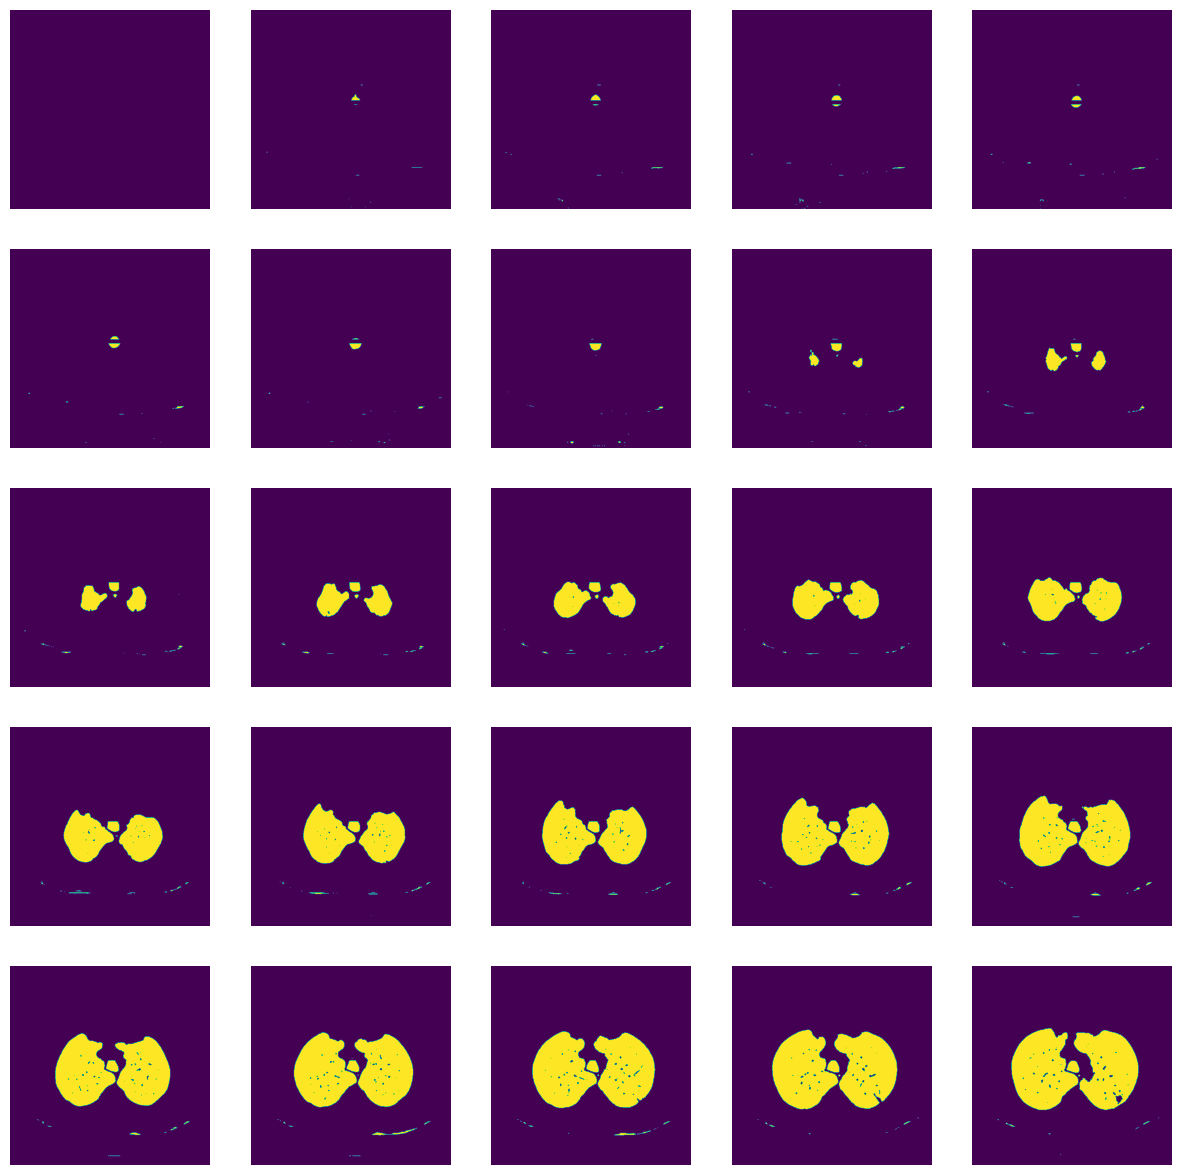

In [61]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######

# Goal: Show the Lungs

from skimage.measure import label

vol = volume_float32
thresh = threshold_otsu(vol)

# Make a binary volume mask of anything below the threshold
volBW = vol < thresh

# Find connected components in the binary mask
labeled_vol, num_features = label(volBW, connectivity=1, return_num=True)

# Iterate through each slice
for s in range(labeled_vol.shape[0]):
    # Find all connected components in the slice
    connected_components, component_count = label(labeled_vol[s], connectivity=1, return_num=True)
    
    # For each connected component in the slice
    for c in range(1, component_count + 1):  # Start from 1 as 0 is background
        # Check if the connected component touches the edge of the image
        if np.any(connected_components == c) and (np.any(connected_components[0, :] == c) or 
                                                  np.any(connected_components[-1, :] == c) or 
                                                  np.any(connected_components[:, 0] == c) or 
                                                  np.any(connected_components[:, -1] == c)):
            # Set all pixels of the connected component in volBW to 0
            volBW[s][connected_components == c] = 0
            
# Visualize the result
_, ax = plt.subplots(5,5, figsize=[15, 15])
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(volBW[:,:,i*5+j], cmap='viridis')
        ax[i, j].axis('off')
plt.show()

######################################################################################################

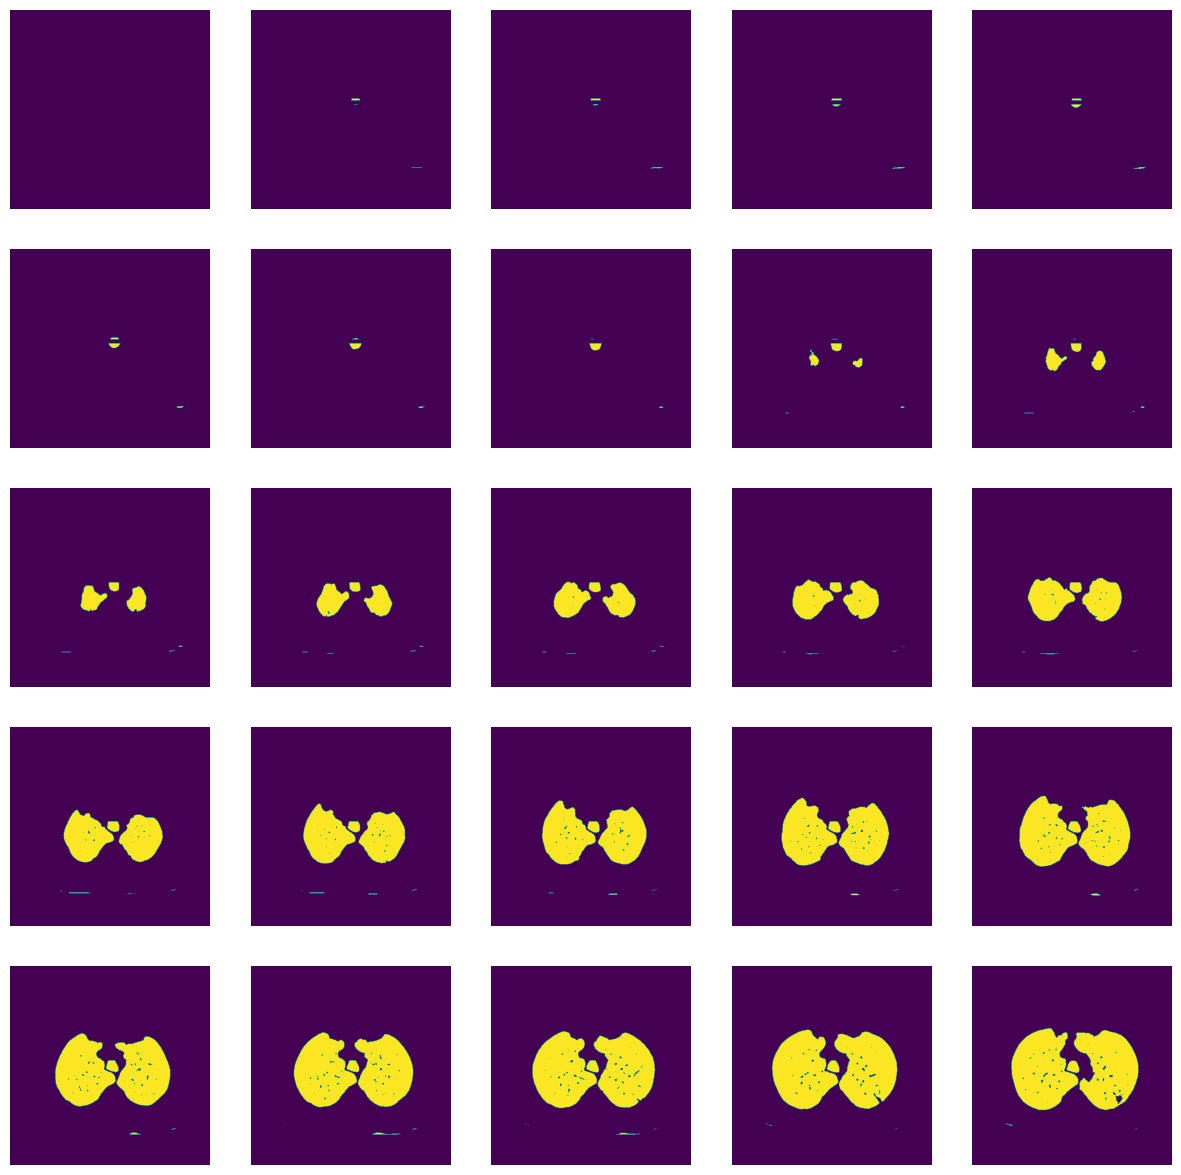

In [71]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######

# copy the volBW but when modifying, volBW should be left unchanged
smoothed_vol = np.copy(volBW)



V = 100

# Iterate through each slice
for s in range(smoothed_vol.shape[0]):
    # Find all connected components in the slice
    connected_components, component_count = label(smoothed_vol[s], connectivity=1, return_num=True)
    
    # For each connected component in the slice
    for c in range(1, component_count + 1):  # Start from 1 as 0 is background
        # Check if the connected component is smaller than V
        if np.sum(connected_components == c) < V:
            # Set all pixels of the connected component in smoothed_vol to 0
            smoothed_vol[s][connected_components == c] = 0

# Visualize the result
_, ax = plt.subplots(5,5, figsize=[15, 15])
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(smoothed_vol[:,:,i*5+j], cmap='viridis')
        ax[i, j].axis('off')



plt.show()
#################################################

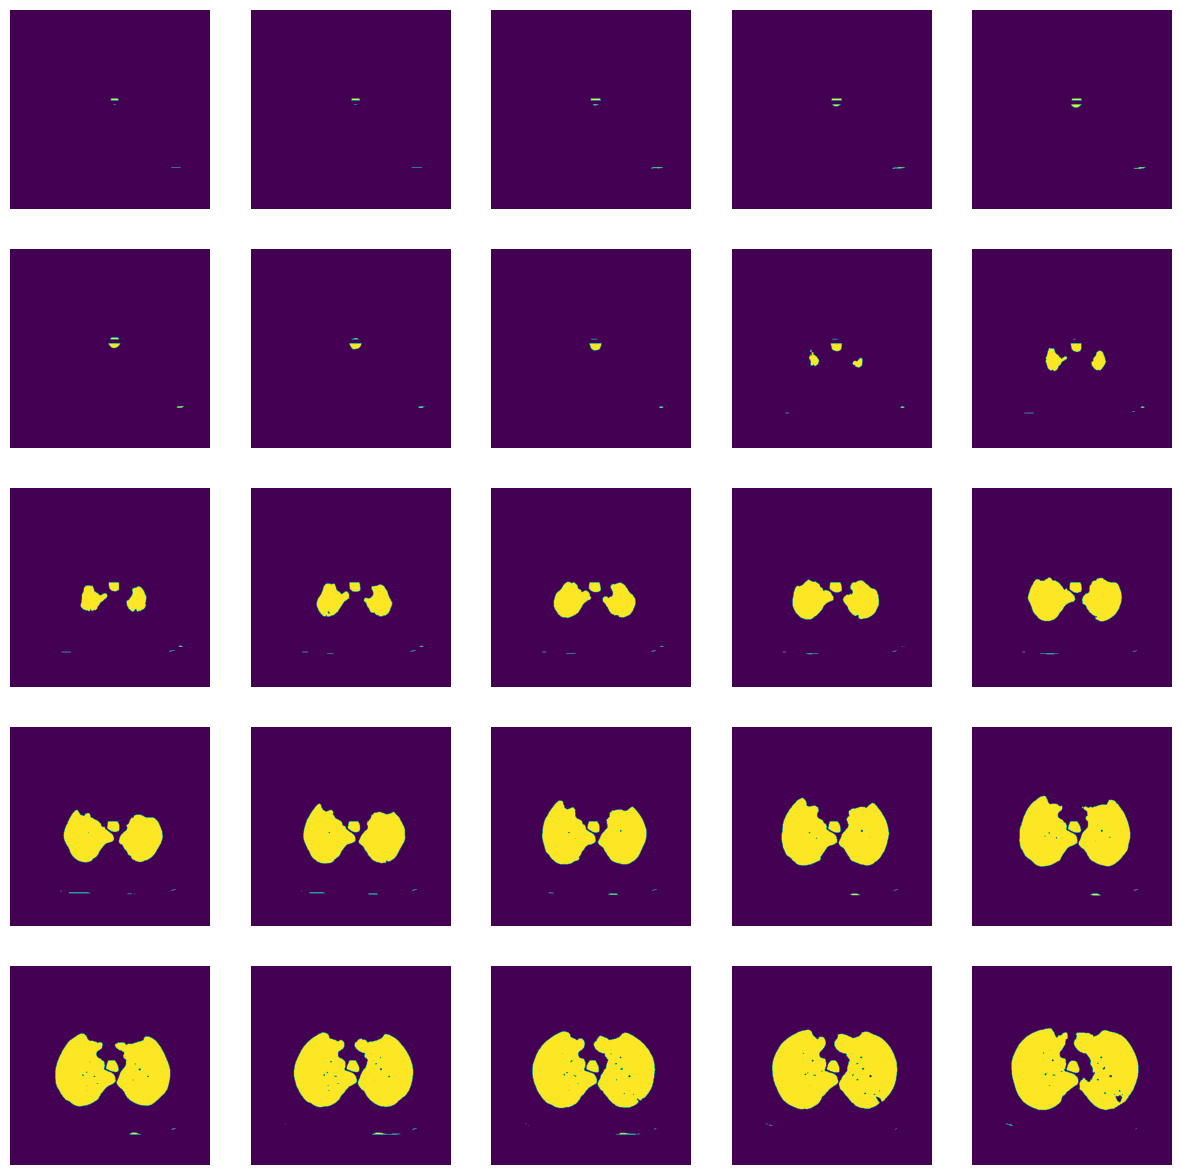

In [73]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######

# Smooth out the edges of the lungs
from skimage.morphology import binary_closing

# Iterate through each slice
for s in range(smoothed_vol.shape[0]):
    # Perform binary closing on the slice
    smoothed_vol[s] = binary_closing(smoothed_vol[s])
    
# Visualize the result
_, ax = plt.subplots(5,5, figsize=[15, 15])
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(smoothed_vol[:,:,i*5+j], cmap='viridis')
        ax[i, j].axis('off')
plt.show()


#################################################

In [ ]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######

######################################################################################################

# Step 7 (5 points each, 15 points total)

Show that the segmentation works on 3 more scans.

## Deliverable:

Same as Step 6, but with different scans.

# Step 8 (Bonus 15 points, 5 points each)

If you’ve finished everything above, you’ve already done a full fledged segmentation. However, for an extra challenge, you can try your hand at:

1. Removing just the trachea so that your segmentation is just on the left and right lung without any of the trachea or bronchi. 

2. Separating out the two halves of the lung into left/right lungs.

3. There are a ton of python packages that help you visualize the lung as a whole. We highly recommend looking up some **marching cube algorithms**. You can also stay with [matplotlib and scikit-image](https://scikit-image.org/docs/stable/auto_examples/edges/plot_marching_cubes.html#sphx-glr-auto-examples-edges-plot-marching-cubes-py). Which should output a figure like this:

<img src="figures/lungs_3d_output.png">

Another, easier, way to go would probably be using something like Fiji. Simply [download Fiji](https://imagej.net/Fiji/Downloads) (available for Windows, Mac, and Linux). You can save all your 3D segmentation as binary image slices. Then, using Fiji, simply read in your image sequence (be sure to name your images some numeric count or something so that Fiji knows what order to read the images in). Then, go to `Plugins -> 3D Viewer`. This should give you a figure like what you see below:

<img src="figures/fiji.png">

Show us that this works on at least two scans.

In [ ]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######



######################################################################################################

In [ ]:
### WRITE CODE IN HERE. You can have up to 5 cells for this question, but only one is required #######


######################################################################################################